In [18]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd
import numpy as np
import cv2

In [2]:
train_df = pd.read_csv(r'E:\SGP Projects\5th Sem\Dataset\training\sign_mnist_train.csv')
test_df = pd.read_csv('E:/SGP Projects/5th Sem/Dataset/testing/sign_mnist_test.csv')

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


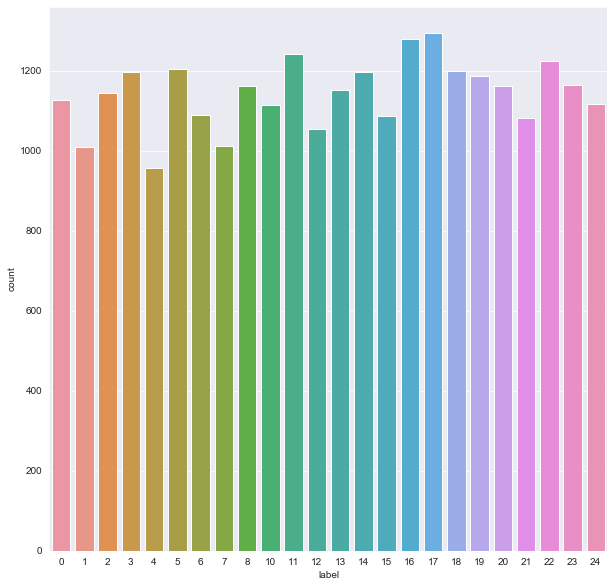

In [3]:
plt.figure(figsize = (10,10)) # Label Count
sns.set_style("darkgrid")
sns.countplot(train_df['label'])

In [4]:
train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

In [6]:
x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345
)

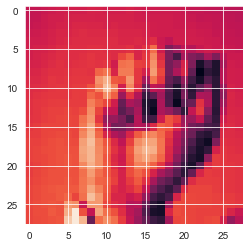

In [7]:
image = x_train[28,:].reshape(28,28)
plt.imshow(image)
plt.show()

In [8]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [9]:
im_rows = 28 
im_cols = 28 
batch_size = 256 
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape) 
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))

x_train shape: (21964, 28, 28, 1)
x_test shape: (7172, 28, 28, 1)
x_validate shape: (5491, 28, 28, 1)


In [42]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=8, kernel_size=(3,3),strides=(1,1),padding='same',input_shape=(28,28,1),activation='relu', data_format='channels_last'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(filters=16, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(MaxPooling2D(pool_size=(4,4)))
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(25, activation='softmax'))

In [43]:
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)

In [44]:
history = cnn_model.fit(x_train, y_train, batch_size=batch_size,
              epochs=40,verbose=1,
              validation_data=(x_validate, y_validate)
             )

Train on 21964 samples, validate on 5491 samples
Epoch 1/40
21964/21964 [==============================] - 14s 629us/sample - loss: 2.8833 - accuracy: 0.1534 - val_loss: 2.4938 - val_accuracy: 0.3826
Epoch 2/40
21964/21964 [==============================] - 13s 574us/sample - loss: 1.5526 - accuracy: 0.5255 - val_loss: 1.4012 - val_accuracy: 0.6808
Epoch 3/40
21964/21964 [==============================] - 12s 566us/sample - loss: 0.8436 - accuracy: 0.7200 - val_loss: 0.8508 - val_accuracy: 0.8496
Epoch 4/40
21964/21964 [==============================] - 13s 575us/sample - loss: 0.5580 - accuracy: 0.8055 - val_loss: 0.5790 - val_accuracy: 0.9017
Epoch 5/40
21964/21964 [==============================] - 14s 630us/sample - loss: 0.4094 - accuracy: 0.8554 - val_loss: 0.4416 - val_accuracy: 0.9323
Epoch 6/40
21964/21964 [==============================] - 13s 580us/sample - loss: 0.3382 - accuracy: 0.8805 - val_loss: 0.3619 - val_accuracy: 0.9628
Epoch 7/40
21964/21964 [=====================

In [45]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


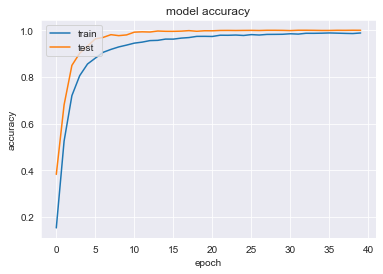

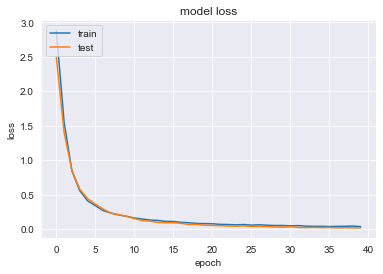

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
cnn_model.save('CNN_model.h5')
model_json = cnn_model.to_json()
with open('model-bw.json', 'w') as json_file:
    json_file.write(model_json)
cnn_model.save_weights('model-bw.h5')
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 32)         

In [47]:
score = cnn_model.evaluate(x_test, y_test, verbose=0)

print('test loss: {:.4f}'.format(score[0]))
print('test accuracy: {:.4f}'.format(score[1]))

test loss: 0.1274
test accuracy: 0.9591
